In [1]:
import pandas as pd 
import numpy as np
import torch
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fashion-mnist_train.csv')


In [4]:
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x=df.loc[0].tolist()[1:]
y=df.loc[0].tolist()[0]

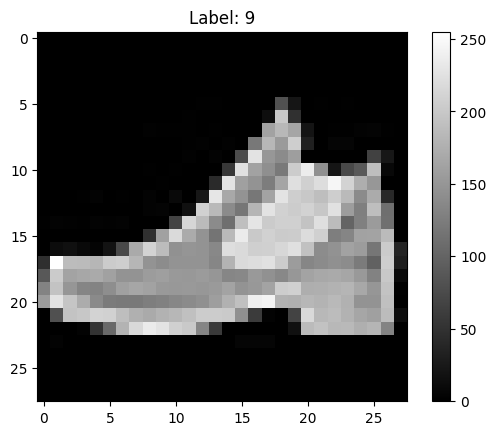

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Your flattened pixels
x = df.loc[1].tolist()[1:]
y = df.loc[1].tolist()[0]

x_image = np.array(x).reshape(28, 28)  

# Show the pixel image
plt.imshow(x_image, cmap="gray")
plt.colorbar()
plt.title(f"Label: {y}")
plt.show()


In [7]:
y=df['label'].values

In [8]:
X=df.iloc[:,1:].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)


In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features= torch.tensor(features,dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index) :
        return self.features[index] , self.labels[index]

In [13]:
train_dataset = CustomDataset(X_train,y_train)


In [14]:
len(train_dataset)

48000

In [15]:
test_dataset = CustomDataset(X_test,y_test)


In [46]:
len(test_dataset)

12000

In [16]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
from turtle import forward


class MySimpleNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
            )
    def forward(self,X):
        return self.model(X)



        

In [23]:
epochs= 100
learning_rate = 0.1


In [19]:
type(X_train.shape[1])

int

In [21]:
import torch.optim as optim


In [22]:
model = MySimpleNN(X_train.shape[1])

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [ ]:
for epoch in range(epochs):
    total_epochs_loss = 0
    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)
        loss = criterion(outputs,batch_labels)
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        total_epochs_loss=total_epochs_loss+loss.item()
    avg_loss=total_epochs_loss/len(train_loader)



KeyboardInterrupt: 

In [ ]:




total = 0
correct = 0
with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted= torch.max(outputs,1)
        total= total +  batch_labels.shape[0]
